# Mushroom Classifier
Name: Kevin Kaminski

The purpose of this notebook is to create a model that can accurately predict whether a new instance of a mushroom fits into one of two binary classifications, 'edible', or 'poisonous'. Data is sourced from UCI's 'mushrooms' dataset, a CSV file of 8124 instances of edible and poisonous mushrooms, each with 23 additional features. Missing values are denoted with '?' characters as denoted in UCI's documentation for the dataset. 

Import common libraries for data wrangling `(pandas)`, linear algebra `(numpy)`, data visualization `(seaborn)` and import the mushrooms data to get an understanding for what it contains. The documentation for the dataset lists what each of the characters listed within the columns indicate, as well as what the column names denote.  Quickly visualize any relationships between stalk features. Additionally ensure that the classes we aim to classify into 'poisonous' and 'edible' are equally represented within the dataset.  

In [1]:
#import common libraries
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

data = pd.read_csv('agaricus-lepiota.data') #read in mushroom dataset
data.head() #view data

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [2]:
names = ["edible", "cap shape", "cap surface", "cap color", "bruises", "odor", "gill attachment", "gill spacing", "gill size", "gill color", "stalk shape", "stalk root", "stalk surface above ring", "stalk surface below ring", "stalk color above ring", "stalk color below ring", "viel type", "veil color", "ring number", "ring type", "spore print color", "population", "habitat"]

data.columns = names #rename the column names to match those given from the UCI documentation
data.head() #view data

,edible,cap shape,cap surface,cap color,bruises,odor,gill attachment,gill spacing,gill size,gill color,...,stalk surface below ring,stalk color above ring,stalk color below ring,viel type,veil color,ring number,ring type,spore print color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


# Visualize the dataset

Take quick look at the dataset's features to draw any cursory conclusions about what features may play a role in helping to predict a correct mushroom class.  Ensure that the poison and edible classes are approximately equally represented as well. Some of the feautures likely don't contribute significantly to the variance of the model, as in the cases of gill attachment, veil color, ring number, viel type and gill spacing.  With a significnat majority of the mushrooms having these described features, they likely impart little information into predicting whether a mushroom is poisonous or edible. It's likely some dimmensionally reduction can be performed.  Also note that the stalk root plot has a category for '?' as it is counting the missing values as a stringed category.  


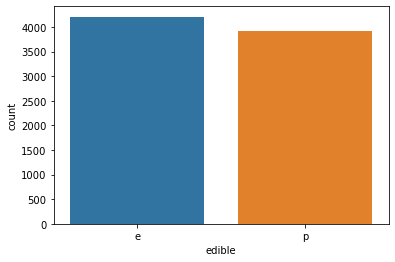

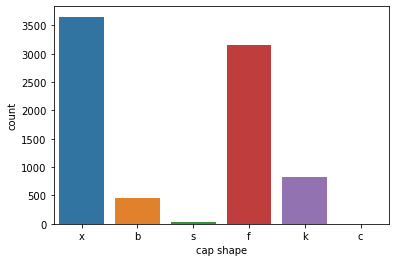

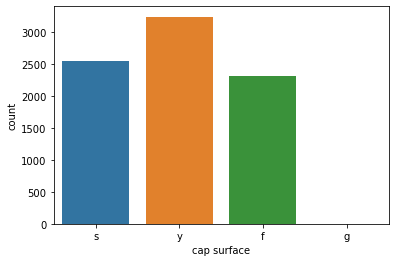

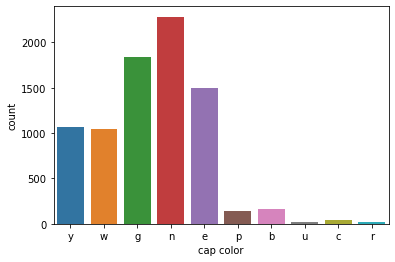

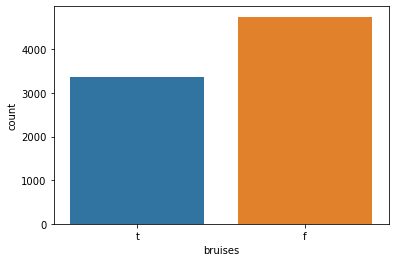

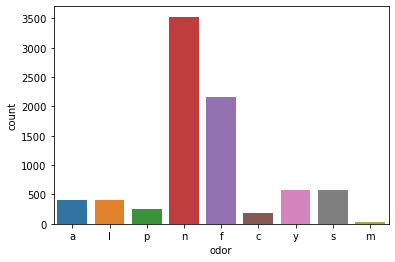

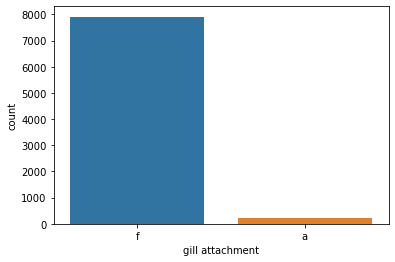

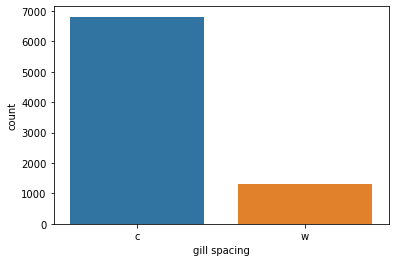

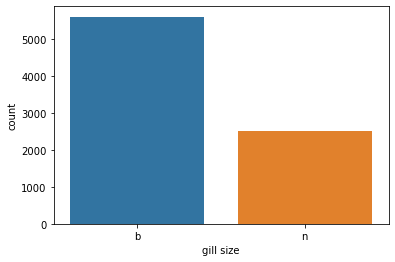

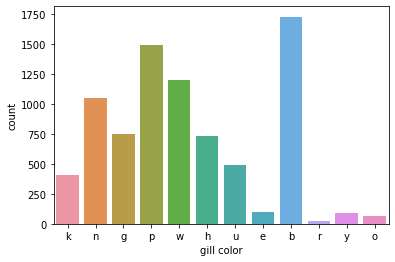

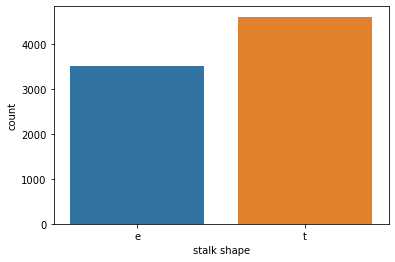

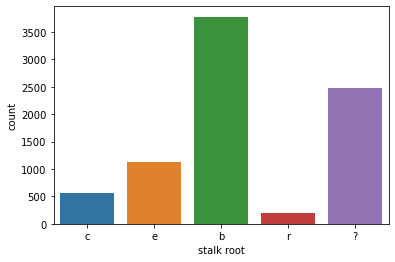

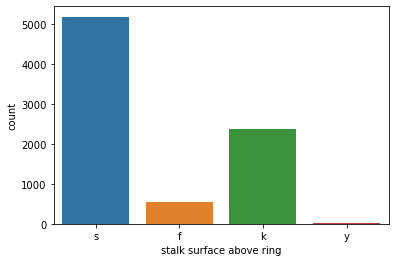

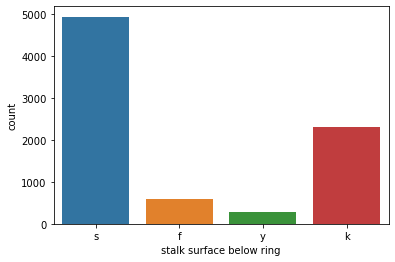

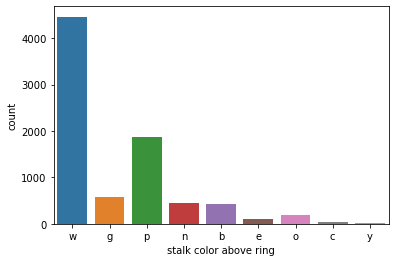

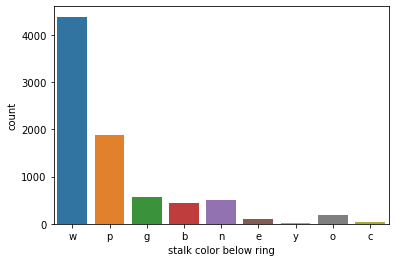

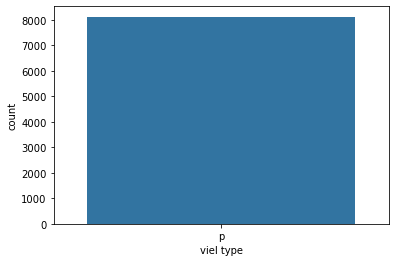

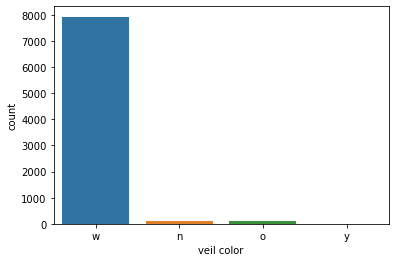

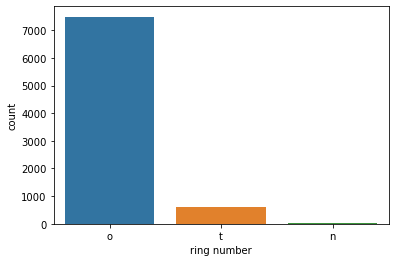

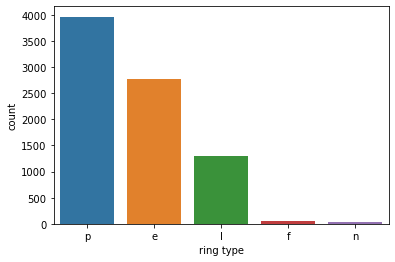

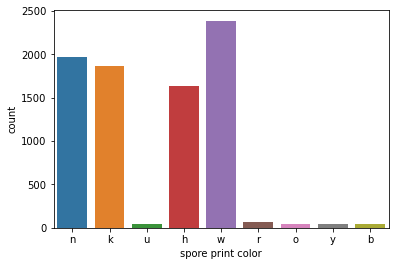

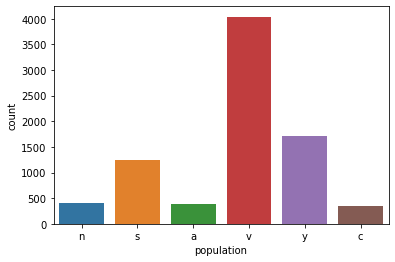

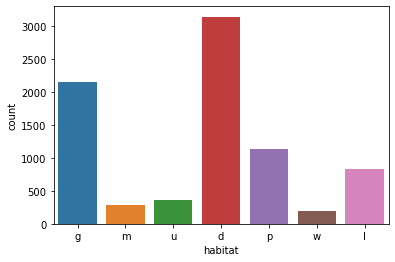

In [3]:
for col in data.columns:
    plt.show(sns.countplot(x = col, data = data))
    #Note that the first plot shows classes are equally represented. 

# Missing Values

The mushrooms dataset holds nearly 2,500 missing values that need to be addressed, in which a KNNImputer class with be utilized.    

The UCI documentation lists "?" as a character denoting missing values.  Determine where the missing values are located. Ensure that all missing values are denoted as a "?" and no values for NaN, NA, or null appear within the dataset. Create a function to count the missing values within the dataset to simplify the process of assesing whether or not the value were correctly dealt with in the future. 

In [4]:
data.isin(["?"]).sum() #gives the columnwise count of missing values. All missing values denoted as '?' are contained within the stalk root column, which agrees with the 'stalk root' plot above. 

edible                         0
cap shape                      0
cap surface                    0
cap color                      0
bruises                        0
odor                           0
gill attachment                0
gill spacing                   0
gill size                      0
gill color                     0
stalk shape                    0
stalk root                  2480
stalk surface above ring       0
stalk surface below ring       0
stalk color above ring         0
stalk color below ring         0
viel type                      0
veil color                     0
ring number                    0
ring type                      0
spore print color              0
population                     0
habitat                        0
dtype: int64

In [5]:
print('Null Values:')
print("")
print(data.isnull().sum()) #no missing data is observed that is listed as a null value
print("") 
print('NA Values') 
print("")
print(data.isna().sum()) #no missing data is obseverd that is listed as a NaN or NA value

Null Values:

edible                      0
cap shape                   0
cap surface                 0
cap color                   0
bruises                     0
odor                        0
gill attachment             0
gill spacing                0
gill size                   0
gill color                  0
stalk shape                 0
stalk root                  0
stalk surface above ring    0
stalk surface below ring    0
stalk color above ring      0
stalk color below ring      0
viel type                   0
veil color                  0
ring number                 0
ring type                   0
spore print color           0
population                  0
habitat                     0
dtype: int64

NA Values

edible                      0
cap shape                   0
cap surface                 0
cap color                   0
bruises                     0
odor                        0
gill attachment             0
gill spacing                0
gill size                   0
g

In [6]:
#Create function to count any missing values within the dataset

def count_missing(df, val):

    missing_values = []

    for row in range(df.shape[0]): #generate data structed to contain indices of all missing values ("?")
        for col in range(df.shape[1]):
            if df._get_value(row, col, takeable= True) == val:
                missing_values.append((row, col))
    return len(missing_values)

In [7]:
#Create a function to relay what indices the missing values are located at in a (row, col) style tuple:

def get_missing_indices(df, val): #obtain the indicies of missing values in the dataframe
    missing_indices = []
    for row in range(df.shape[0]): #generate data structed to contain indices of all missing values ("?")
        for col in range(df.shape[1]):
            if df._get_value(row, col, takeable= True) == val:
                missing_indices.append((row, col))
    return missing_indices

In [8]:
count_missing(data, '?') #Testing for missing values indicates we have 2480 missing pieces, which is in line with our assessment earlier. 

2480

In [10]:
missing_value_index = get_missing_indices(data, '?') #return all indicies of missing values ('?')

In [11]:
missing_value_index[0:7] #observe the first 7 missing values, all of which come from the stalk column

[(3983, 11),
 (4022, 11),
 (4075, 11),
 (4099, 11),
 (4103, 11),
 (4195, 11),
 (4199, 11)]

In [12]:
#Since we know that the values are solely located in the 'stalk root' column, it is more imperative to grab JUST the row indices and impute the values back into the stalk root column. 
missing_row_index = [row[0] for row in missing_value_index] #holds indices of rows that hold missing values

missing_row_index[0:7] #observe the first 7 indices of missing values

[3983, 4022, 4075, 4099, 4103, 4195, 4199]

# Encoding the Dataset

Because the dataset has all categorical features and KNN algorithms utilize euclidean distance to classify datapoints, the categorical features must be encoded into numerical features before using distance based algorithms such as KNN. Here I am using pd.get_dummies to encode the dataset, excluding the first column which acts as our response variables.  The rows containing the missing values will automatically be encoded as 0s in the encoded dataset, and will have to manually be replaced.  Additionally, the response data (the 'edible' column), must be encoded as well, into a single column of 1 or 0, indicating 1 = poisonous, and 0 = edible. Use `drop_first` in order to retain a single column.  


In [13]:
features = data.drop('edible', axis = 1) #create features data by dropping the 'edible' response column
features = pd.get_dummies(features) #one hot encode the dataset
features.head() #examine the data

,cap shape_b,cap shape_c,cap shape_f,cap shape_k,cap shape_s,cap shape_x,cap surface_f,cap surface_g,cap surface_s,cap surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [14]:
response = pd.get_dummies(data['edible'], drop_first = True) #encode response data into numerical values
response.columns = ['edible'] #rename column
response.head() #examine data

,edible
0,0
1,0
2,1
3,0
4,0


The data being encoded splits the stalk root column values into 5 columns, 4 for categorical features, and one for the '?' values:

In [15]:
[col for col in features if col.startswith('stalk root')] #since our missing values were contained in the stalk root column, we now need to find the stalk_root one hot encoded columns and replace these values with nan instead of 0s in order to implement the KNN imputer

['stalk root_?',
 'stalk root_b',
 'stalk root_c',
 'stalk root_e',
 'stalk root_r']

In [16]:
#replace incorrect 0's assumed by pandas with nan's in order to perform imputation
features.loc[missing_row_index, 'stalk root_b':'stalk root_r'] = features.loc[missing_row_index, 'stalk root_b':'stalk root_r'].replace(0, np.nan) 

In [17]:
features.loc[missing_row_index, 'stalk root_b':'stalk root_r'] #confirm the values targeted have been converted to NaNs
#features.loc[missing_row_index, 'stalk root_b':'stalk root_r'].isna() #additional check on NaN values. 

,stalk root_b,stalk root_c,stalk root_e,stalk root_r
3983,NaN,NaN,NaN,NaN
4022,NaN,NaN,NaN,NaN
4075,NaN,NaN,NaN,NaN
4099,NaN,NaN,NaN,NaN
4103,NaN,NaN,NaN,NaN
...,...,...,...,...
8118,NaN,NaN,NaN,NaN
8119,NaN,NaN,NaN,NaN
8120,NaN,NaN,NaN,NaN
8121,NaN,NaN,NaN,NaN


In [18]:
#since one hot encoded divided up the stalk column into a stalk_? category, the column needs to be removed as it has no true input into our dataset. 
features = features.drop('stalk root_?', axis = 1)

# KNN Imputation
The dataset is now one hot encoded, and all missing values contained in our missing_rows have been converted to np.nans.  The conversion to np.nan is necessary as the KNNimputer class default recognizes np.nan as the values to be imputed.  

In [19]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 3, metric = 'nan_euclidean') #create KNNImputer instance checking 3 nearest neighbors
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns = features.columns) #create new dataframe of features with imputed values

In [20]:
missing_values = features_imputed.loc[missing_row_index, 'stalk root_b':'stalk root_r'] #save imputed values into data structure
missing_values #confirm values are imputed

,stalk root_b,stalk root_c,stalk root_e,stalk root_r
3983,1.0,0.0,0.0,0.0
4022,1.0,0.0,0.0,0.0
4075,0.0,0.0,1.0,0.0
4099,1.0,0.0,0.0,0.0
4103,1.0,0.0,0.0,0.0
...,...,...,...,...
8118,0.0,0.0,1.0,0.0
8119,0.0,0.0,1.0,0.0
8120,0.0,0.0,1.0,0.0
8121,1.0,0.0,0.0,0.0


In [183]:
count_missing(features_imputed, '?') #check to see that all values are imputed

0

# Splitting the Data

Now that all values are imputed, split the data into training and testing sets

In [21]:
from sklearn.model_selection import train_test_split
#setting the test size to 40% since a 20% was likely overfitting the data at 100% accuracy
X_train, X_test, y_train, y_test = train_test_split(features_imputed, response, test_size = 0.4, random_state = 80)
y_train = np.ravel(y_train) #convert to appropriate dimension

# Applying a Random Forest Classifier

Apply a random forest classifier on the new imputed dataset to attempt to classify new instances of mushrooms as edible or poisonous.  A series of grid searches will be applied in order to find the best parameters for the model.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [100, 200, 500, 1000], 'max_depth': [2, 5, 10], 'min_samples_split': [2, 3, 4]}

grid = GridSearchCV(estimator=RandomForestClassifier(random_state = 80), param_grid = param_grid, cv = 10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=80),
             param_grid={'max_depth': [2, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 500, 1000]})

In [23]:
grid.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 1000}

In [24]:
param_grid = {'n_estimators': [500, 1000, 1500, 2000], 'max_depth': [2, 5, 10], 'min_samples_split': [2, 3, 4]}

grid = GridSearchCV(estimator=RandomForestClassifier(random_state = 80), param_grid = param_grid, cv = 10)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 1000}

In [25]:
param_grid = {'n_estimators': [800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 3]}

grid = GridSearchCV(estimator=RandomForestClassifier(random_state = 80), param_grid = param_grid, cv = 10)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 900}

In [26]:
param_grid = {'n_estimators': [850, 900, 950], 'max_depth': list(range(5,15,1)), 'min_samples_split': [2]}

grid = GridSearchCV(estimator=RandomForestClassifier(random_state = 80), param_grid = param_grid, cv = 10)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 850}

In [27]:
#create the optimal random forest classifier and test:

rf = RandomForestClassifier(random_state = 80, max_depth = 10, min_samples_split = 2, n_estimators = 850)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=850, random_state=80)

In [28]:
y_pred_train = rf.predict(X_train) #predict values from the training set

# Evaluating the model

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error as mse 

acc = accuracy_score(y_pred_train, y_train)
prec = precision_score(y_pred_train, y_train)
rec = recall_score(y_pred_train, y_train)
rmse = np.sqrt(mse(y_pred_train, y_train)) #RMSE scores of 0.0, indicates 0% error

print("Accuracy score:", acc) #100% accuracy on train set
print("Precision score:", prec)  
print("Recall score:", rec)  
print("RMSE:", rmse)  #0 measure of error on train set

Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
RMSE: 0.0


In [30]:
y_pred_test = rf.predict(X_test) #predict new values from the test set

acc = accuracy_score(y_pred_test, y_test) #nearly 100% accuracy on test set
prec = precision_score(y_pred_test, y_test)
rec = recall_score(y_pred_test, y_test)
rmse = np.sqrt(mse(y_pred_test, y_test)) #nearly 0 error on test set

print("Accuracy score:", np.round(acc, 4))   
print("Precision score:", np.round(prec, 4))  
print("Recall score:", np.round(rec, 4))  
print("RMSE:", np.round(rmse, 4)) 

Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
RMSE: 0.0


# Predictions and overfitting

At this point it is important to note that with 100% accuracy, the model is likely overfitting the training data, and would generalize poorly onto the additional testing data. Some of the measures that can be taken to reduce overfitting is through regularization.  In addition to cross validation done in the grid searches, the simplest means to regularize the model is to reduce the max_depth of the trees and performing a dimensionality reduction:

# Principal Component Analysis

With the random forest potentially overfitting the data, it is possible the feature space is too large to prevent generalizing the data.  To combat this, the data may benefit from dimension reduction with principal component analysis.  
- Perform a PCA to reduce the number of features to 95% variance.  
- Assess whether the reduced featurespace changes the accuracy of the model.


In [31]:
from sklearn.decomposition import PCA #collect estimators that explain approximately 95% of the variance
pca = PCA()
pca.fit_transform(features_imputed);

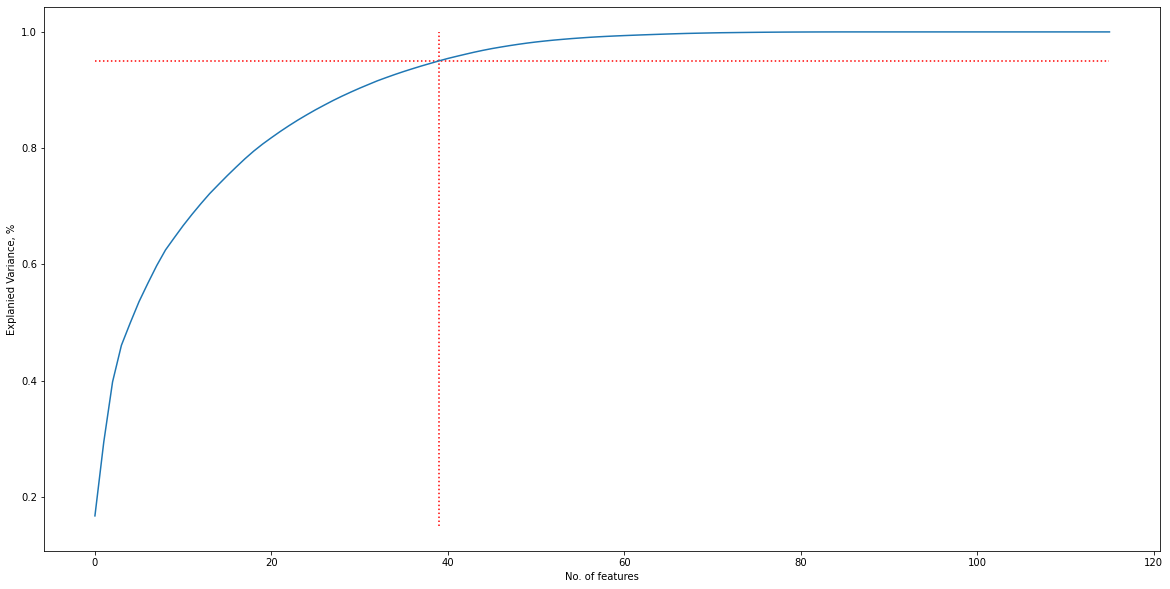

In [32]:
fig = plt.figure(figsize = (20,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.hlines(y = 0.95, xmin = 0, xmax = 115, linestyles = 'dotted', color = 'r')
plt.vlines(x = 39, ymin = 0.15, ymax = 1.0, linestyles = 'dotted', color = 'r')
plt.xlabel("No. of features")
plt.ylabel("Explanied Variance, %");

#The plot indicates 95% of variance is explained by 39 features, a reduction of 67% of features. 

In [33]:
new_features = PCA(n_components = 39) #create PCA instance holindg 39 features, with 95% explained variance
new_features = new_features.fit_transform(features_imputed) #fit PCA to the imputed features data

# Revaluating the model

With the feature space being reduced, create a new training / testing set to evaluate the new model's performance.  Train a new random forest classifier, with a corresponding grid search and revaluate the optimal model's performance. 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(new_features, response, test_size = 0.4, random_state = 80)
y_train = np.ravel(y_train) #reshape response column

In [35]:

param_grid = {'n_estimators': [200, 500, 1000], 'max_depth': [2, 5, 10], 'min_samples_split': [2,3,4]}

grid = GridSearchCV(estimator=RandomForestClassifier(random_state = 80), param_grid = param_grid)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}

In [36]:
param_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [10, 15, 20], 'min_samples_split': [2, 3, 4]}

grid = GridSearchCV(estimator=RandomForestClassifier(random_state = 80), param_grid = param_grid)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 50}

In [37]:
param_grid = {'n_estimators': list(range(1,10)), 'max_depth': list(range(5,15,1)), 'min_samples_split': [2]}

grid = GridSearchCV(estimator=RandomForestClassifier(random_state = 80), param_grid = param_grid)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 11, 'min_samples_split': 2, 'n_estimators': 9}

In [38]:
#Retrain the optimal random forest classifier 

rf = RandomForestClassifier(random_state = 80, max_depth=11, min_samples_split=2, n_estimators = 8)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, n_estimators=8, random_state=80)

In [39]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [40]:
acc = accuracy_score(y_pred_train, y_train)
prec = precision_score(y_pred_train, y_train)
rec = recall_score(y_pred_train, y_train)
rmse = np.sqrt(mse(y_pred_train, y_train)) #RMSE scores of 0.0, indicates 0% error

print("Training set Accuracy score:", np.round(acc,4))   
print("Training set Precision score:", np.round(prec, 4))  
print("Training set Recall score:", np.round(rec, 4))  
print("Training set RMSE:", np.round(rmse, 4))  

Training set Accuracy score: 0.9998
Training set Precision score: 0.9996
Training set Recall score: 1.0
Training set RMSE: 0.0143


In [41]:
acc = accuracy_score(y_pred_test, y_test)
prec = precision_score(y_pred_test, y_test)
rec = recall_score(y_pred_test, y_test)
rmse = np.sqrt(mse(y_pred_test, y_test)) #RMSE scores of 0.0, indicates 0% error

print("Test set Accuracy score:", np.round(acc,4))   
print("Test set Precision score:", np.round(prec, 4))  
print("Test set Recall score:", np.round(rec, 4))  
print("Test set RMSE:", np.round(rmse, 4))  

Test set Accuracy score: 0.9978
Test set Precision score: 0.9961
Test set Recall score: 0.9994
Test set RMSE: 0.0464


# Conclusion

The random forest classifier is able to very accruately predict the correct class of mushroom from the given dataset.  High accuracy is obtained from testing on the training set as expected, however is also produced on the testing data as well.  With the model predicting with near 100% accuracy, there is potential for the model to overfit the data.  To evaluate this, testing size was trialed at 40% in order to introduce more diversity into the new mushrooms instances.  10-fold cross validation is performed within the grid searches to reduce overfitting as well.  Max_depth of tree branches was trialed at a reduced number.  Principal component analysis reduced the feature space size by 67% from 117 to 39 relevant features, while still providing over 99% accuracy. 

With the efforts to reduce overfitting of the classifier providing no change in accuracy, it is possible the model is appropriately fitting the dataset and can predict accurately with the given features.  It may be beneficial to gather more data to supplement the data in order to generalize better to new mushroom instances. 

